# TP: Introduction au langage R
## I. Pré-traitement
### I.1 Librairies

### I.2 Variables globales

## II. Les basiques de R
### II.1. Arithmétique élémentaires

[1] 0.30103

### II.2. Conserver les calculs : les variables
### II.3. Quelques fonctions de base de R
### II.4. 

## Annexes
### A. Construire des histogrammes

In [ ]:
bin_width_estimator = function( X )
{
	if( class(X) == "list" )
	{
		bw = Inf
		for( i in 1:length(X) )
			bw = base::min( bw , bin_width_estimator( X[[i]] ) )
		return(bw)
	}
	
	n_samples = length(X)
	bw = NULL
	if( n_samples < 1000 )
	{
		bw = 1. / ( base::log2(n_samples) + 1 )
	}
	else
	{
		q = as.vector(stats::quantile(X,base::c(0.25,0.75)))
		bw = 2 * (q[2] - q[1]) / n_samples^(1/3)
	}
	
	return(bw)
}

In [33]:
X = stats::rnorm( n = 30000 , mean = 0 , sd = 1 )
Y = stats::rnorm( n = 30000 , mean = 3 , sd = 2 )

In [34]:
histogram = function( X , bins = NULL )
{
	## Find bins
	if( is.null(bins) )
	{
		bw = bin_width_estimator(X)
		bins = base::seq( base::min(X) - bw / 2 , base::max(X) + bw / 2 , bw )
	}
	n_bins = length(bins)
	n_p = n_bins - 1
	n_samples = length(X)
	
	## Find probs
	p = numeric(n_p)
	for( i in 1:n_p )
		p[i] = base::sum(bins[i] <= X & X < bins[i+1]) / n_samples
	
	## Find x
	x = (bins[2:n_bins] + bins[1:n_p]) / 2
	
	return( list( p = p , x = x ) )
}

In [35]:
bin_width = bin_width_estimator(list(X,Y))
bins = base::seq( base::min(X,Y) - bin_width , base::max(X,Y) + bin_width , bin_width )
hX = histogram(X,bins)
hY = histogram(Y,bins)

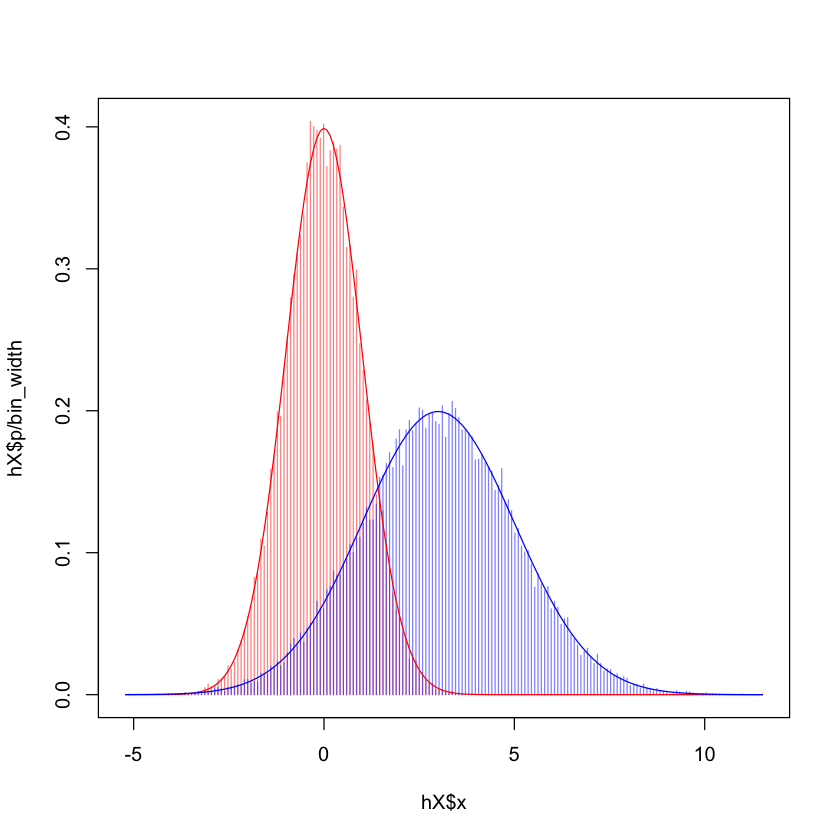

In [40]:
xlim = base::c(base::min(bins),base::max(bins))
ylim = base::c( 0 , base::max(hX$p,hY$p) / bin_width )
plot(  hX$x , hX$p / bin_width , col = grDevices::rgb(1,0,0,0.5) , type = "h" , xlim = xlim , ylim = ylim )
lines( hY$x , hY$p / bin_width , col = grDevices::rgb(0,0,1,0.5) , type = "h" )
lines( hX$x , stats::dnorm( hX$x , mean = 0 , sd = 1 ) , col = "red" )
lines( hY$x , stats::dnorm( hY$x , mean = 3 , sd = 2 ) , col = "blue" )

### B. Généralisation: les densités